<a href="https://colab.research.google.com/github/sittuk-kibet/week7_plp_assignment/blob/main/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal widt

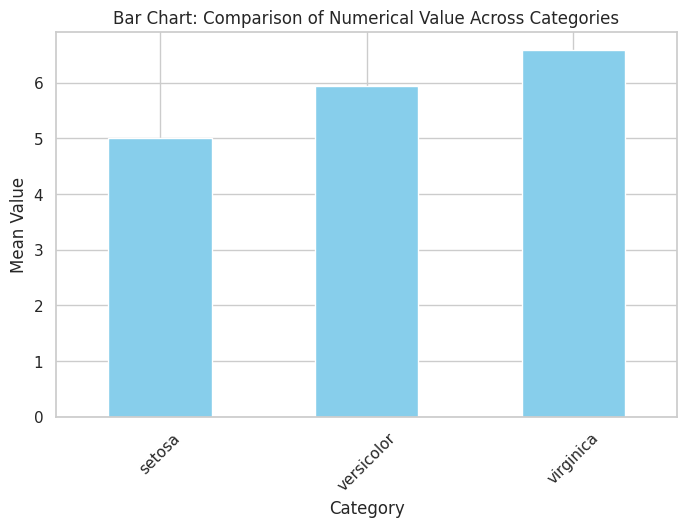

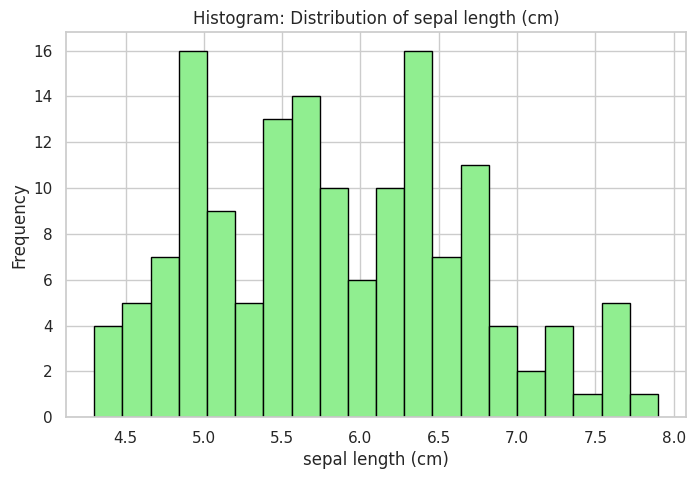

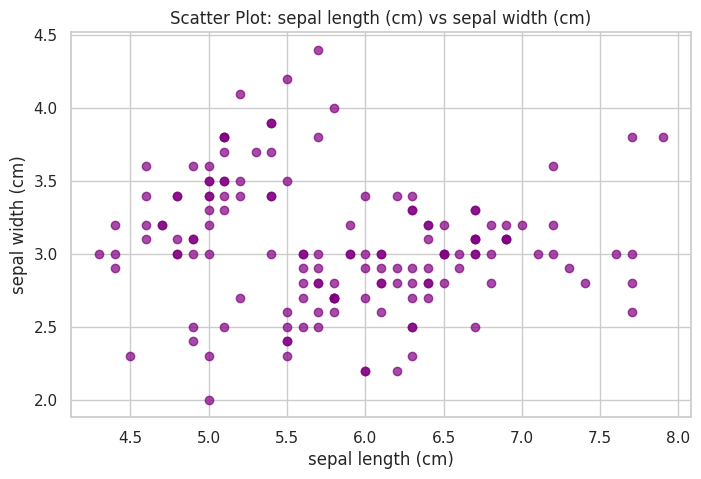

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Save Iris dataset to CSV
iris = load_iris(as_frame=True)
iris_data = iris.frame
iris_data['species'] = iris_data['target'].map({i: name for i, name in enumerate(iris.target_names)})
iris_data.to_csv('iris.csv', index=False)

# Task 1: Load and Explore the Dataset
def load_and_explore_data(file_path):
    try:
        # Load the dataset
        data = pd.read_csv(file_path)

        # Display the first few rows
        print("First few rows of the dataset:")
        print(data.head())

        # Display the data structure
        print("\nDataset info:")
        print(data.info())

        # Check for missing values
        print("\nMissing values in the dataset:")
        print(data.isnull().sum())

        # Drop missing values
        data = data.dropna()
        return data
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Task 2: Basic Data Analysis
def basic_data_analysis(data):
    # Basic statistics
    print("\nBasic statistics:")
    print(data.describe())

    # Grouping and mean computation
    group_col = 'species'
    num_col = data.select_dtypes('number').columns[0]

    print(f"\nMean of {num_col} grouped by {group_col}:")
    grouped_mean = data.groupby(group_col)[num_col].mean()
    print(grouped_mean)

    return grouped_mean

# Task 3: Data Visualization
def data_visualization(data, grouped_mean):
    sns.set(style="whitegrid")

    # Bar chart (comparison across categories)
    plt.figure(figsize=(8, 5))
    grouped_mean.plot(kind='bar', color='skyblue')
    plt.title("Bar Chart: Comparison of Numerical Value Across Categories")
    plt.xlabel("Category")
    plt.ylabel("Mean Value")
    plt.xticks(rotation=45)
    plt.show()

    # Histogram (distribution of a numerical column)
    num_col = data.select_dtypes('number').columns[0]
    plt.figure(figsize=(8, 5))
    plt.hist(data[num_col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f"Histogram: Distribution of {num_col}")
    plt.xlabel(num_col)
    plt.ylabel("Frequency")
    plt.show()

    # Scatter plot (relationship between two numerical columns)
    num_cols = data.select_dtypes('number').columns
    if len(num_cols) > 1:
        plt.figure(figsize=(8, 5))
        plt.scatter(data[num_cols[0]], data[num_cols[1]], alpha=0.7, color='purple')
        plt.title(f"Scatter Plot: {num_cols[0]} vs {num_cols[1]}")
        plt.xlabel(num_cols[0])
        plt.ylabel(num_cols[1])
        plt.show()

# Main Execution
def main():
    file_path = "iris.csv"  # Path to your dataset

    # Task 1: Load and Explore the Dataset
    data = load_and_explore_data(file_path)
    if data is None:
        return

    # Task 2: Basic Data Analysis
    grouped_mean = basic_data_analysis(data)

    # Task 3: Data Visualization
    data_visualization(data, grouped_mean)

if __name__ == "__main__":
    main()
